#  8. Simple ANN implementation with feed forward and backpropogation

In [1]:
import tensorflow as tf

from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_test[0].shape

(28, 28)

In [6]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

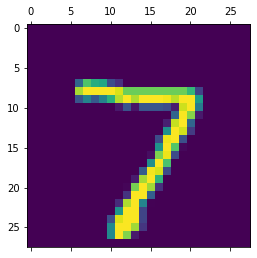

In [7]:
plt.matshow(x_test[0])

In [8]:
y_test[0]

7

In [9]:
#flatening the dataset to one dimenstion array

In [10]:
x_test.shape

(10000, 28, 28)

In [11]:
x_test[0].shape

(28, 28)

In [12]:
#scaling the data in the range 0 to 1
x_test=x_test/255
x_train=x_train/255

In [13]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [14]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [16]:
# dense will make each neuron to every other neuron in the neural network

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_flattened,y_train,epochs=5)

ERROR! Session/line number was not unique in database. History logging moved to new session 85
Train on 60000 samples
Epoch 1/5


60000/60000 [==============================] - 2s 40us/sample - loss: 0.4919 - accuracy: 0.8769
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3066 - accuracy: 0.9159
Epoch 3/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.2857 - accuracy: 0.9210
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2751 - accuracy: 0.9243
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2684 - accuracy: 0.9257


In [1]:
# model.evaluate(x_test_flattened,y_test)

In [18]:
y_predicted=model.predict(x_test_flattened)

In [19]:
y_predicted[0]

array([2.8312206e-06, 0.0000000e+00, 7.3909760e-06, 6.7119598e-03,
       3.5762787e-07, 4.6849251e-05, 0.0000000e+00, 6.0169733e-01,
       2.4527311e-05, 4.2170286e-04], dtype=float32)

In [20]:
y_predicted_labels=[ np.argmax(i) for i in y_predicted ]
y_predicted_labels=np.array(y_predicted_labels)
y_predicted_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [21]:
y_test[2]

1

In [22]:
np.argmax(y_predicted[2])

1

In [23]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: id=58320, shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1109,    5,    1,    0,    1,    4,    2,   13,    0],
       [   7,    6,  945,   11,    7,    2,   12,    9,   29,    4],
       [   5,    0,   23,  916,    1,   27,    2,    9,   21,    6],
       [   1,    1,    6,    1,  925,    0,    7,    4,    8,   29],
       [  10,    2,    3,   31,    9,  783,   17,    5,   26,    6],
       [  11,    3,    6,    1,    7,   11,  916,    1,    2,    0],
       [   1,    7,   27,    7,    8,    1,    0,  939,    2,   36],
       [   9,    6,    7,   22,    8,   24,   12,    9,  869,    8],
       [  11,    7,    1,   10,   30,    8,    0,   20,    5,  917]])>

<AxesSubplot:>

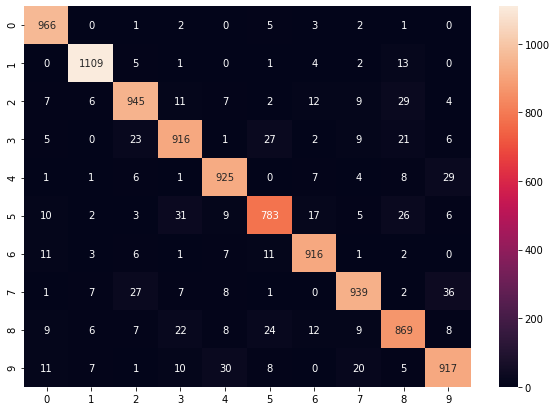

In [24]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')

In [25]:
#adding a internal layer in the model to increase the accuracy
model = keras.Sequential([
     keras.layers.Dense(1000, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.fit(x_train_flattened,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1991 - accuracy: 0.9413
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0805 - accuracy: 0.9755
Epoch 3/5
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0523 - accuracy: 0.9834
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0368 - accuracy: 0.9881
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0280 - accuracy: 0.9912


In [26]:
model.evaluate(x_test_flattened,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0721376440517779, 0.9794]

In [27]:

y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[ np.argmax(i) for i in y_predicted ]
y_predicted_labels=np.array(y_predicted_labels)
y_predicted_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

<AxesSubplot:>

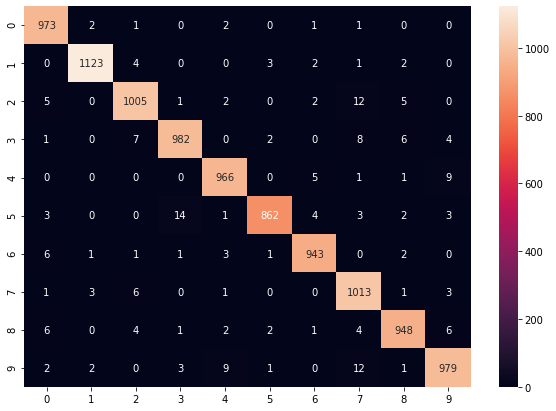

In [28]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')

In [29]:
#adding a internal layer in the model to increase the accuracy
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(1000,  activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



model.fit(x_train,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2018 - accuracy: 0.9398
Epoch 2/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0805 - accuracy: 0.9749
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0521 - accuracy: 0.9839
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0363 - accuracy: 0.9882
Epoch 5/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0277 - accuracy: 0.9909


In [ ]:
# from the above model the accuracy is comming out to be 99 which is good